In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
def setter(BS, t):
    normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    if t == 1:
        transform_train = transforms.Compose([
            transforms.RandomResizedCrop(32),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize
        ])
    else:
        transform_train = transforms.Compose([
            transforms.ToTensor(),
            normalize
        ])

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])

    trainset = torchvision.datasets.CIFAR10(
        root='./data',
        train=True,
        download=True,
        transform=transform_train
    )
    trainloader = torch.utils.data.DataLoader(
        trainset,
        batch_size=BS,
        shuffle=True,
        num_workers=2
    )

    testset = torchvision.datasets.CIFAR10(
        root='./data',
        train=False,
        download=True,
        transform=transform_test
    )
    testloader = torch.utils.data.DataLoader(
        testset,
        batch_size=BS,
        shuffle=False,
        num_workers=2
    )

    return trainloader, testloader


In [3]:
def oneLayer():
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(3072, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            x = self.fc1(x)
            return x

    net = Net()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.to(device)

    return net, device

def multipleLayers():
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(3072, 140)
            self.fc2 = nn.Linear(140, 84)
            self.fc3 = nn.Linear(84, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    net = Net()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.to(device)

    return net, device

def tutorialCode():
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 5)
            self.pool = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(6, 16, 5)
            self.fc1 = nn.Linear(16 * 5 * 5, 140)
            self.fc2 = nn.Linear(140, 84)
            self.fc3 = nn.Linear(84, 10)

        def forward(self, x):
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = x.view(x.size(0), -1)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    net = Net()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.to(device)

    return net, device

In [4]:
def accuracyTest(net, setter, device):
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in setter:
            images, labels = images.to(device), labels.to(device)

            outputs = net(images)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct // total


In [5]:
def runItAll(net, learning_rate, trainloader, testloader, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

    loss_array = []
    training_acc = []
    testing_acc = []

    for epoch in range(25):
        epoch_loss = 0.0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        loss_array.append(epoch_loss / len(trainloader))
        training_acc.append(accuracyTest(net, trainloader, device))
        testing_acc.append(accuracyTest(net, testloader, device))

    return loss_array, training_acc, testing_acc

def graphLoss(loss_array):
    plt.plot(loss_array)
    plt.ylabel('Loss')
    plt.show()

def graphRunAccuracy(training_acc):
    plt.plot(training_acc)
    plt.ylabel('Train Accuracy')
    plt.show()

def graphTestAccuracy(testing_acc):
    plt.plot(testing_acc)
    plt.ylabel('Test Accuracy')
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


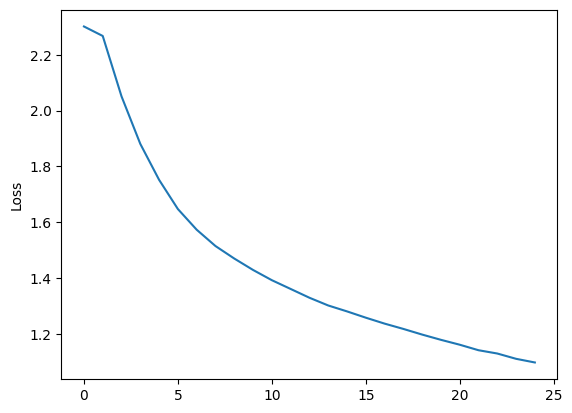

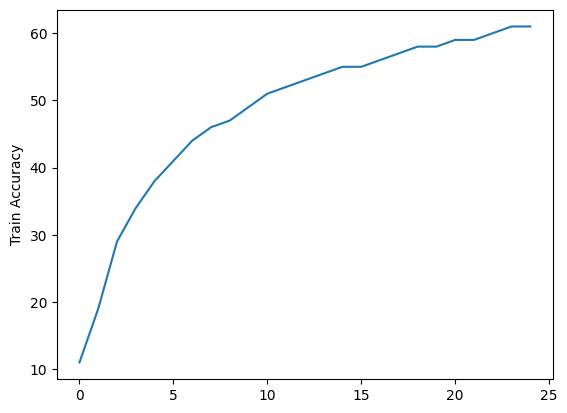

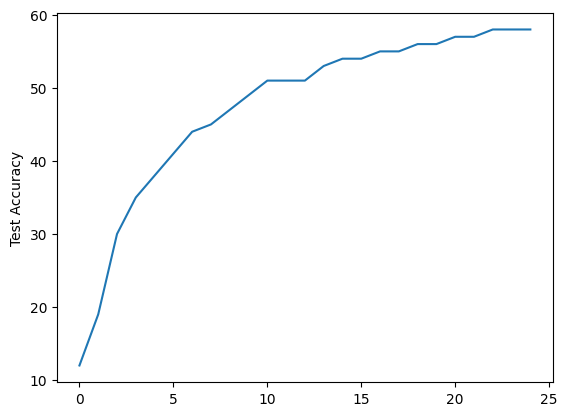

In [6]:
batch = 100
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


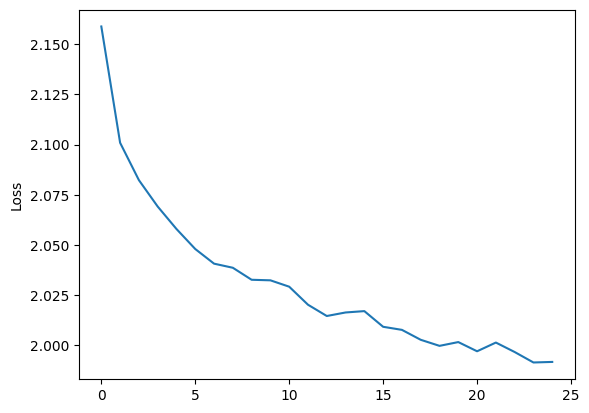

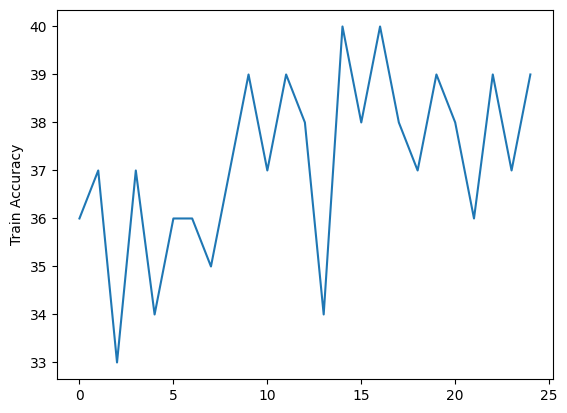

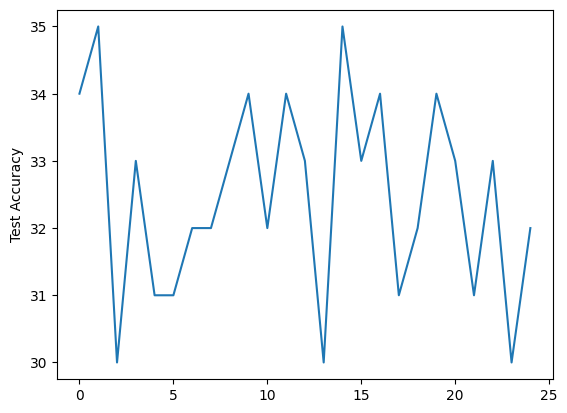

In [14]:
# Q2 One Layer Network

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = oneLayer()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


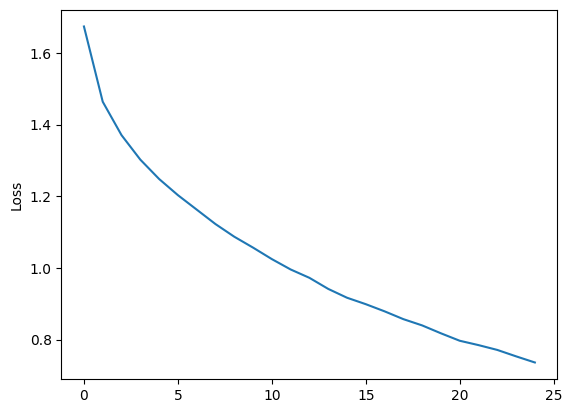

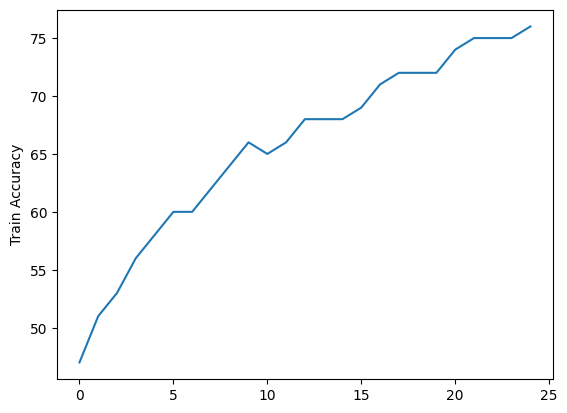

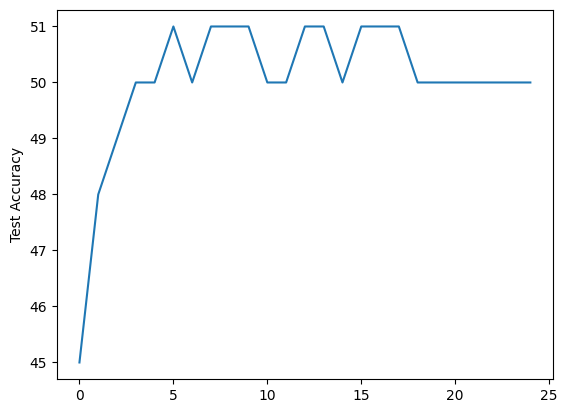

In [15]:
# Q3 Multiple Layer Network

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = multipleLayersdis()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


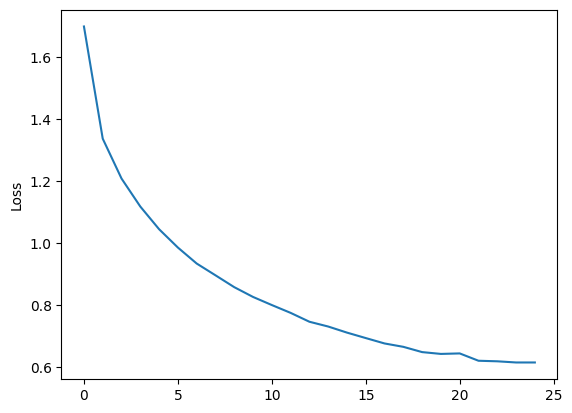

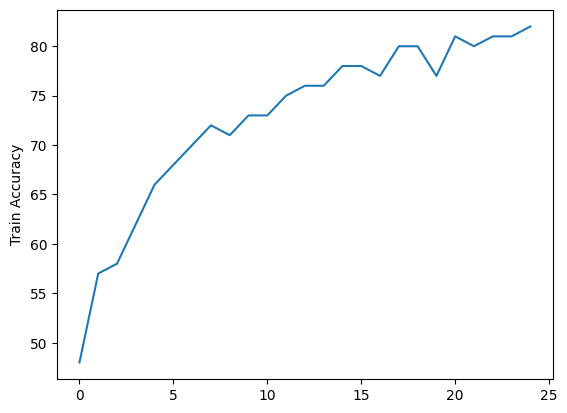

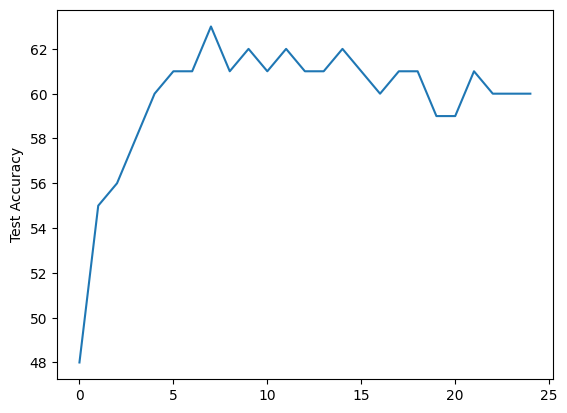

In [16]:
# Q4 Convolution and Maxpooling/Default Network

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


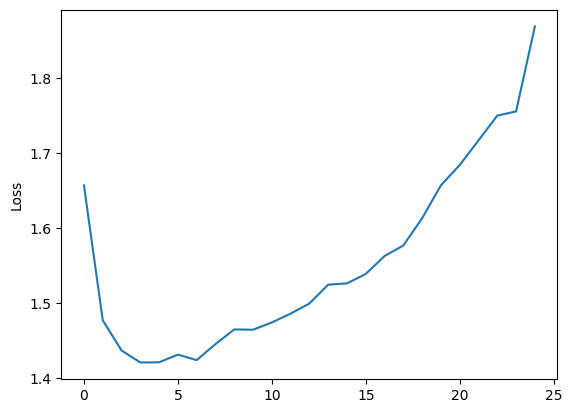

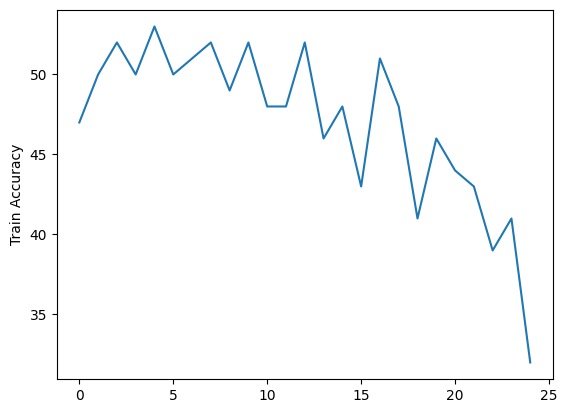

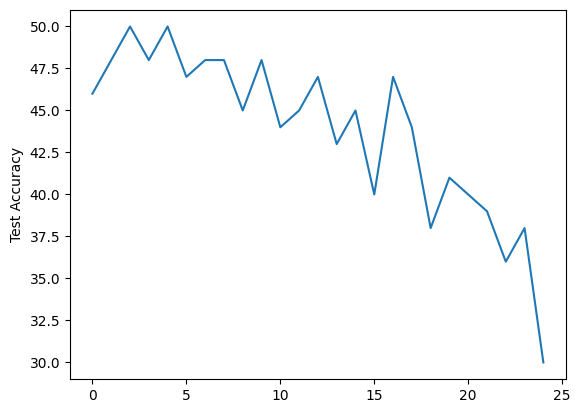

In [7]:
# Q5 Batch Size of 1

batch = 1
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


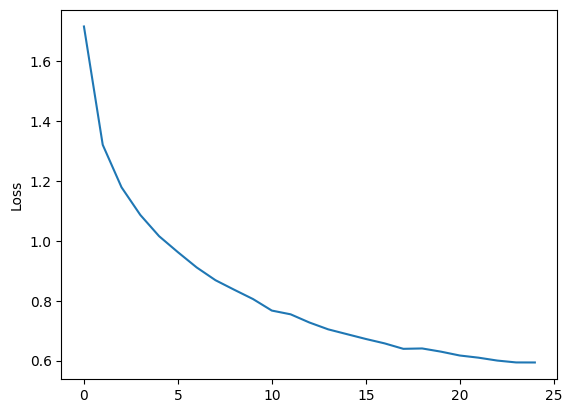

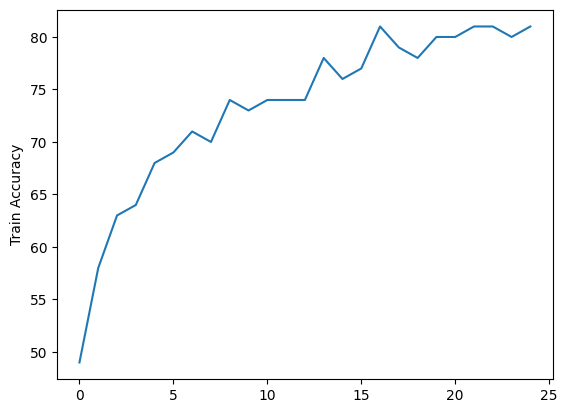

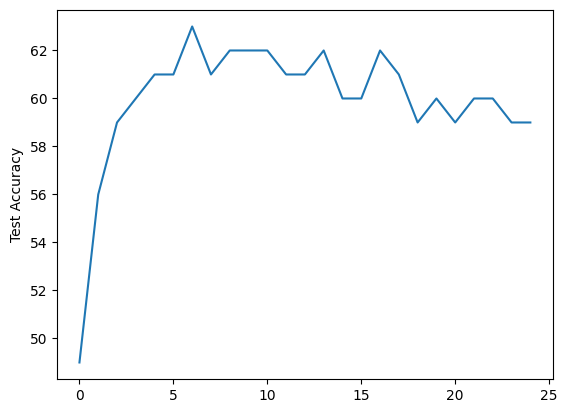

In [8]:
# Q5 Batch Size of 4

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


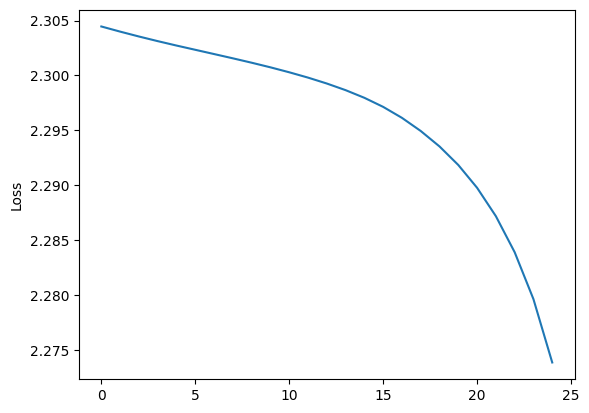

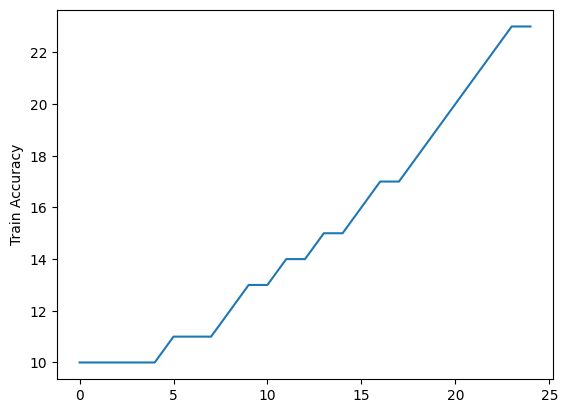

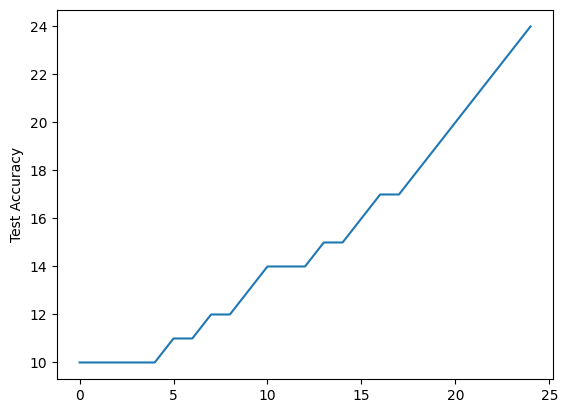

In [15]:
# Q5 Batch Size of 1000

batch = 1000
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


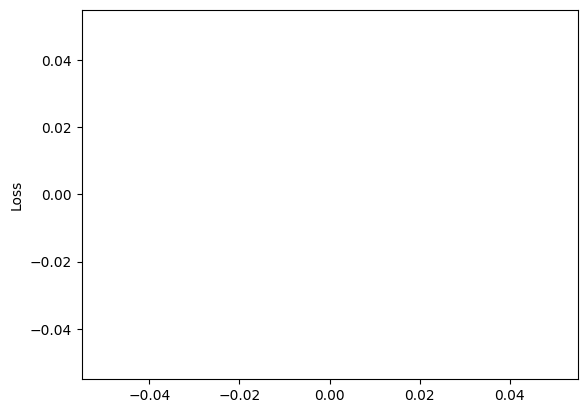

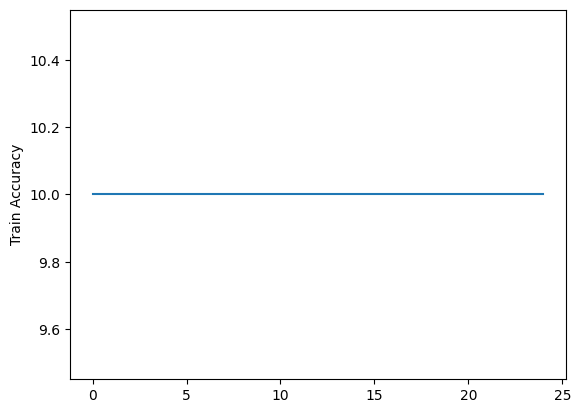

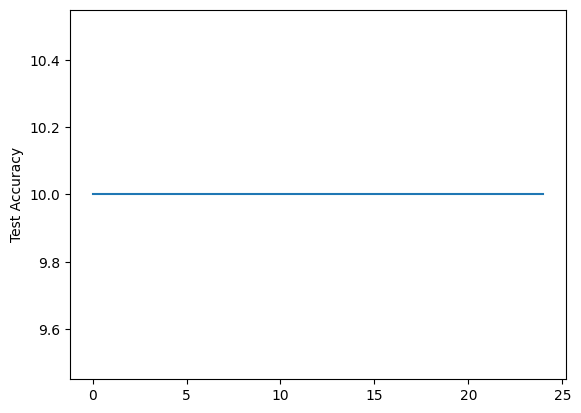

In [10]:
# Q6 Learning Rate of 10

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 10
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


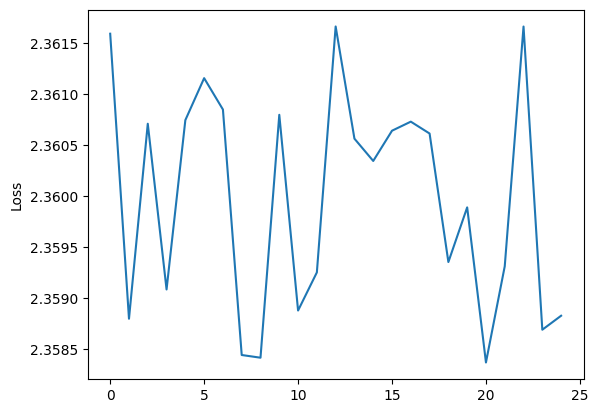

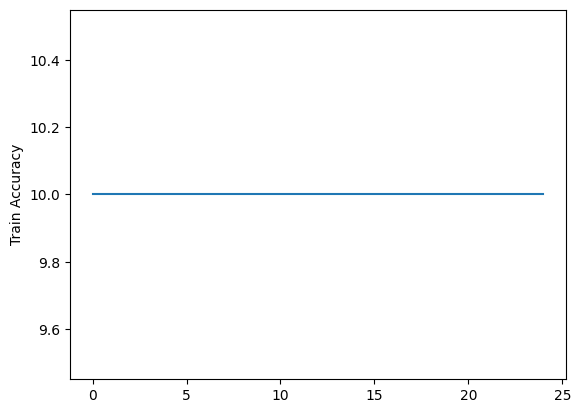

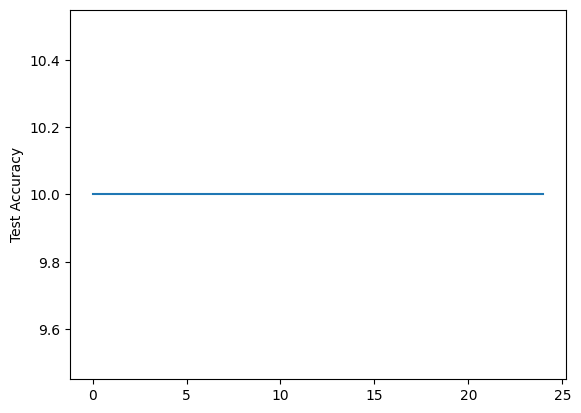

In [11]:
# Q6 Learning Rate of 0.1

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.1
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


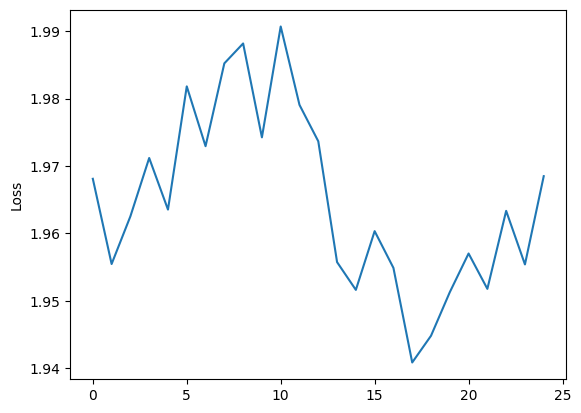

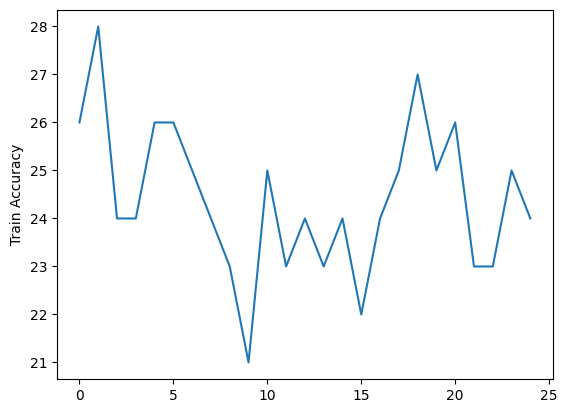

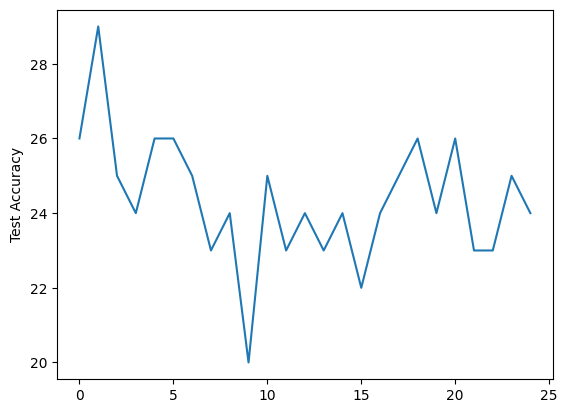

In [16]:
# Q6 Learning Rate of 0.01

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.01
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


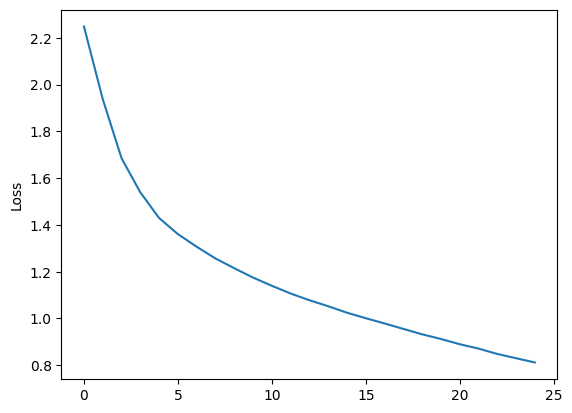

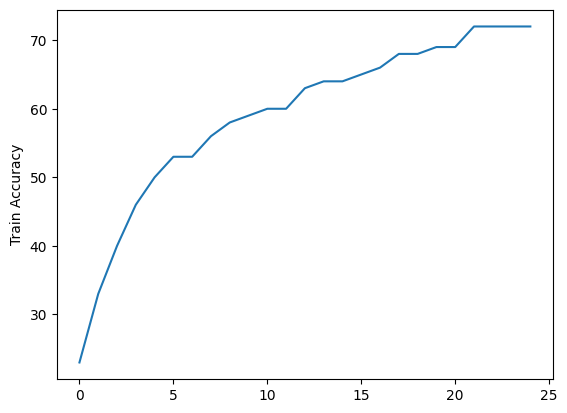

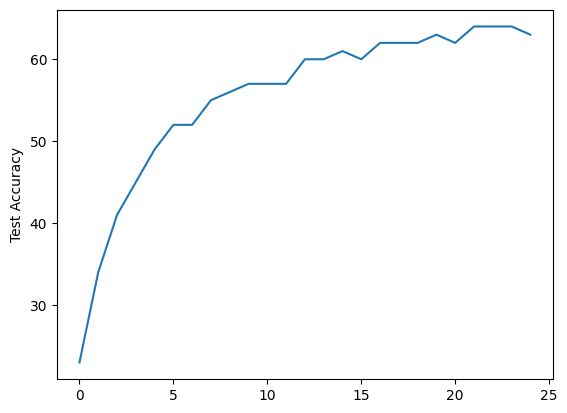

In [13]:
# Q6 Learning Rate of 0.0001

batch = 4
transformation = 0
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.0001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Files already downloaded and verified
Files already downloaded and verified


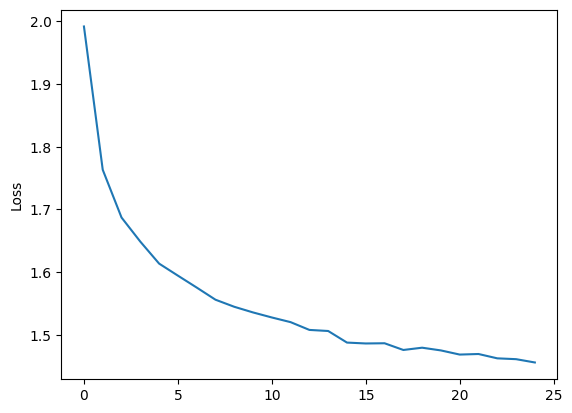

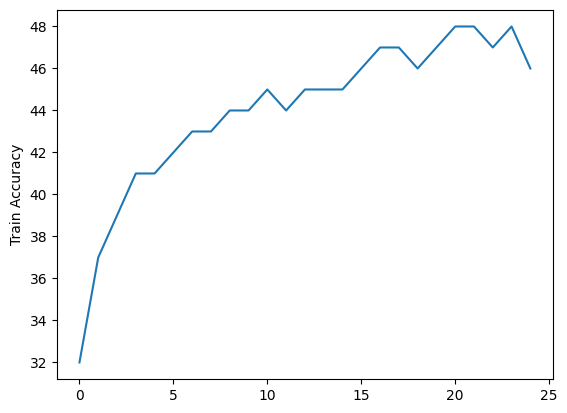

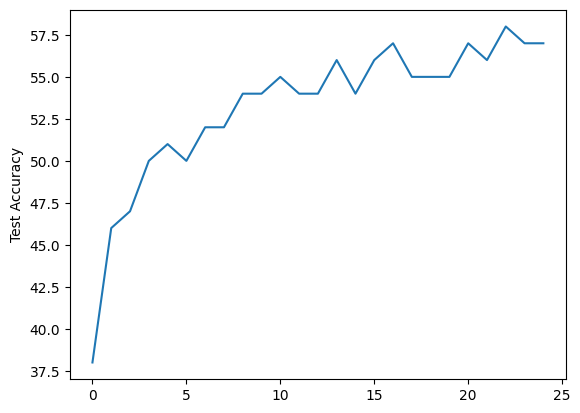

In [14]:
# Q7 With Additional Transformations

batch = 4
transformation = 1
trainloader, testloader = setter(batch, transformation)

net, device = tutorialCode()

learnRate = 0.001
loss, trainingAccuracy, testingAccuracy = runItAll(net, learnRate, trainloader, testloader, device)

graphLoss(loss)
graphRunAccuracy(trainingAccuracy)
graphTestAccuracy(testingAccuracy)

Written Section

Question 2:

The total number of parameters in this layer is the sum of the elements in the weight matrix plus the elements in the bias vector is (10 * 3072) + 10 = 30,730, which is the total number of parameters.

Question 3:

If ReLU is not used between the linear layers, the network would consist of only linear transformations. In this case, the network would effectively reduce to a single linear layer connecting the input to the output, as mentioned in the original question. Without non-linear activation functions like ReLU, the network would lose its ability to learn complex patterns and relationships in the data. Consequently, the network's capacity to model and solve more sophisticated tasks would be severely limited.

In summary, using ReLU activation functions between the linear layers introduces non-linearity and enables the network to learn complex representations, which is crucial for capturing and understanding intricate patterns in the data.

Question 5:

When the batch size is set to 1, the loss initially starts at a middle point, decreases, and then increases in a parabolic shape. The accuracy for both training and testing data shows a downward trend with some oscillations.

On the other hand, when the batch size is set to 4, the loss follows a smooth downward curve. The training accuracy shows a steady increase with some minor zigzag patterns towards the end. The testing accuracy exhibits a similar behavior but ends at a lower point compared to its peak.

With a larger batch size of 100, the loss chart forms a smooth bell curve, gradually decreasing. Both the training and testing accuracy increase steadily diagonally.

In summary, the choice of batch size influences the behavior of the loss and accuracy trends. A smaller batch size introduces more fluctuations and a parabolic loss shape, while a larger batch size leads to smoother trends and more consistent accuracy improvements.

Question 6:

When a learning rate of 10 is used, the loss graph is empty, indicating that the model fails to converge. Both the train and test accuracy remain constant at 10.0, suggesting that the model is not learning effectively.

At a learning rate of 0.1, the loss graph exhibits significant oscillations, starting at a high point and ending at a lower one. Similar to the previous case, both the train and test accuracy remain flat lined at 10.0, indicating limited learning.

With a learning rate of 0.01, the loss graph shows significant oscillations multiple times but generally settles around the middle value of 1.97. The train and test accuracy start at a high point of 26 and gradually decrease towards the end.

At a smaller learning rate of 0.0001, the loss graph demonstrates a smooth downward curve, indicating effective learning. Both the train and test accuracy exhibit a smooth upward trend, reaching a plateau at the top.

In summary, the choice of learning rate impacts the convergence and stability of the model. Very high learning rates prevent convergence, while moderately high learning rates cause oscillations. Optimal learning rates lead to smoother loss curves and increasing accuracy trends, while excessively small learning rates may slow down learning progress.